# OHP Atmospheric Profile

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : April 28th 2017
- update : May 3rd 2017



This notebook provide the atmospheric profile for OHP taken from LibRandTran version 2.0.1 for **afglus** atmosphere

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import re
import pandas as pd

In [2]:
from astropy.constants import N_A,R,g0
from astropy import units as u

In [3]:
print R

  Name   = Gas constant
  Value  = 8.3144598
  Uncertainty  = 4.8e-06
  Unit  = J / (K mol)
  Reference = CODATA 2014


In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Initialisation

In [5]:
PlotFigFlag=True

## Physical Constants

In [6]:
M_air= 28.965338*u.g/u.mol
M_air_dry=28.9644*u.g/u.mol
M_h2o=18.016*u.g/u.mol
P0=101325.*u.Pa;   # /*!< Pa : pressure at see level */
T0=288.15*u.K;   #/*!< sea level temperature */  
L=0.0065*u.K/u.m  # refroidissement en fonction de l'altitude

## Analytical Function definitions

In [7]:
def T(h):
    T=T0-L*h
    return T

### Isothermal P(h)

In [8]:
def Pressure_isotherm(altitude):
    """
    Pressure( double altitude)
    Provide the pressure at the altitude.
    Attention, ici on considère de l'air sec.
    
    - Input : altitude : input altitude in meters
    - Output :pressure  : output pressure in Pa SI 
    """
    h=altitude
    P=P0*np.exp(-((g0*M_air_dry)/(R*T0))*h)
    return P  

### Non isothermal P(h)

In [9]:
def Pressure(h):
    thelog=np.log(1.-L*h/T0)
    P=P0*np.exp((g0*M_air_dry)/(R*L)*thelog)
    return P

In [10]:
def Density(h):
    """
    Number of molecules per unit volume
    """
    rhoM=N_A*Pressure(h)/(R*T(h))
    return rhoM

In [11]:
alt=np.linspace(0,20,100)*u.km
pres_isotherm=Pressure_isotherm(alt)
pres=Pressure(alt)
dens=Density(alt)

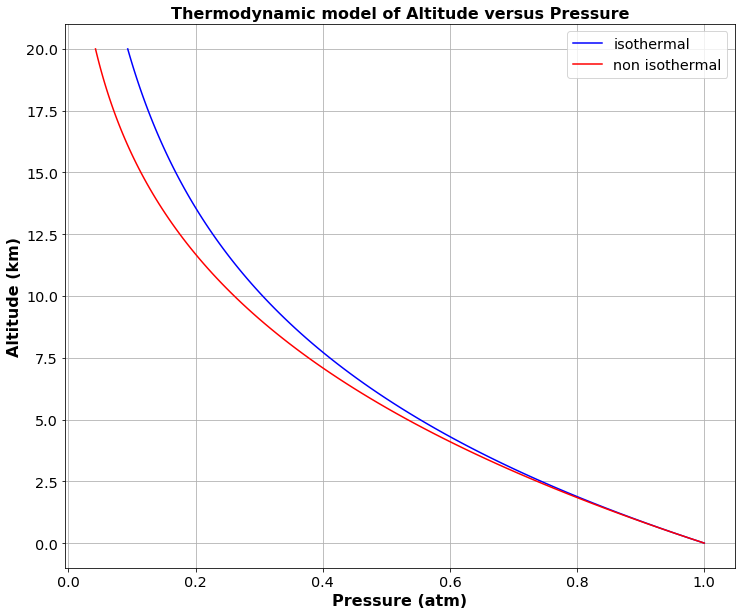

In [12]:
plt.plot(pres_isotherm/P0,alt,'b-',label='isothermal')
plt.plot(pres/P0,alt,'r-',label='non isothermal')
plt.title('Thermodynamic model of Altitude versus Pressure',fontweight="bold",fontsize=16)
plt.xlabel('Pressure (atm)',fontweight="bold",fontsize=16)
plt.ylabel('Altitude (km)',fontweight="bold",fontsize=16)
plt.grid()
plt.legend()
if PlotFigFlag:
    plt.savefig('altvspressure.png')

## Input file definitions on atmosphere

In [13]:
#atmprofile_ascii_file='libradtran_data/UVSPEC_OHP_atmprof_verbose cut.txt'
atmprofile_ascii_file='libradtran_data/prof_afglus_cut.txt'
atmprofile_ascii_file2='libradtran_data/prof_afglmw_cut.txt'
atmprofile_ascii_file3='libradtran_data/prof_afglms_cut.txt'

| lc |  z[km]  |  Pressure  | Temp.  |    Air      |   Ozone     |     O2      | Water vap.  |    CO2      |    NO2      |      O4      |

|  -   |   km      |   [hPa]    |  [K]   |   [cm-3]    |   [cm-3]    |   [cm-3]    |   [cm-3]    |   [cm-3]    |   [cm-3]    | [1.0e+46cm-6]|
     

In [14]:
data_table=np.loadtxt(atmprofile_ascii_file,skiprows=4)
data_table2=np.loadtxt(atmprofile_ascii_file2,skiprows=4)
data_table3=np.loadtxt(atmprofile_ascii_file3,skiprows=4)

### Summaries on integrated densities over columns
--------------------------------------------------------
| atmosphere|    Air      |   Ozone     |     O2      | Water vap.  |    CO2      |    NO2 |

| afglus | 2.0e+25cm-2 |  343.696 DU | 4.2e+24cm-2 | 10.835 kg/m2 | 6.6e+21cm-2 | 0.20598 DU|

| afglmw | 2.0e+25cm-2 |  377.648 DU | 4.2e+24cm-2 |  6.542 kg/m2 | 6.6e+21cm-2 | 0.20055 DU |

|afglms | 2.0e+25cm-2 |  333.735 DU | 4.2e+24cm-2 | 21.538 kg/m2 | 6.6e+21cm-2 | 0.22075 DU |
 

In [15]:
atm_summaries= [[ 0., 0., 2.0e+25, 4.2e+24, 343.696, 10.835, 6.6e+21, 0.20598 ],
...             [ 0., 0., 2.0e+25, 4.2e+24, 377.648, 6.542 , 6.6e+21, 0.20055 ],
...             [ 0., 0., 2.0e+25, 4.2e+24, 333.735, 21.538 ,6.6e+21, 0.22075 ]]            

In [16]:
NbLayers=data_table.shape[0]
GroundData_OHP=data_table[NbLayers-1,:]
GroundData_OHP2=data_table2[NbLayers-1,:]
GroundData_OHP3=data_table3[NbLayers-1,:]

In [17]:
ar = np.array([[GroundData_OHP[2],GroundData_OHP[3],GroundData_OHP[4] ,GroundData_OHP[6], GroundData_OHP[5],GroundData_OHP[7],GroundData_OHP[8],GroundData_OHP[9]],
... [GroundData_OHP2[2],GroundData_OHP2[3],GroundData_OHP2[4] ,GroundData_OHP2[6], GroundData_OHP2[5],GroundData_OHP2[7],GroundData_OHP2[8],GroundData_OHP2[9]],
... [GroundData_OHP3[2],GroundData_OHP3[3],GroundData_OHP3[4] ,GroundData_OHP3[6], GroundData_OHP3[5],GroundData_OHP3[7],GroundData_OHP3[8],GroundData_OHP3[9]]])
df = pd.DataFrame(ar, index = ['afglus_grd', 'afglmw_grd', 'afglms_grd'], columns = ['P', 'T', 'Air', 'O2','O3','PWV','CO2','NO2'])

In [18]:
df

,P,T,Air,O2,O3,PWV,CO2,NO2
afglus_grd,937.22595,283.98,2.390570e+19,5.000690e+18,6.785990e+11,1.592780e+17,7.895830e+15,550316000.0
afglmw_grd,937.82373,269.93,2.516510e+19,5.262860e+18,7.031330e+11,9.457420e+16,8.309770e+15,579166000.0
afglms_grd,939.39349,291.28,2.335970e+19,4.886270e+18,7.539820e+11,3.629170e+17,7.715160e+15,537723000.0


In [19]:
ar2 = np.array([[GroundData_OHP[2],GroundData_OHP[3],GroundData_OHP[4] ,GroundData_OHP[6], GroundData_OHP[5],GroundData_OHP[7],GroundData_OHP[8],GroundData_OHP[9]],
... [GroundData_OHP2[2],GroundData_OHP2[3],GroundData_OHP2[4] ,GroundData_OHP2[6], GroundData_OHP2[5],GroundData_OHP2[7],GroundData_OHP2[8],GroundData_OHP2[9]],
... [GroundData_OHP3[2],GroundData_OHP3[3],GroundData_OHP3[4] ,GroundData_OHP3[6], GroundData_OHP3[5],GroundData_OHP3[7],GroundData_OHP3[8],GroundData_OHP3[9]],
... [ 0., 0., 2.0e+25, 4.2e+24, 343.696, 10.835, 6.6e+21, 0.20598 ],
... [ 0., 0., 2.0e+25, 4.2e+24, 377.648, 6.542 , 6.6e+21, 0.20055 ],
... [ 0., 0., 2.0e+25, 4.2e+24, 333.735, 21.538 ,6.6e+21, 0.22075 ]])
df2 = pd.DataFrame(ar2, index = ['afglus_grd', 'afglmw_grd', 'afglms_grd','afglus_sum', 'afglmw_sum', 'afglms_sum'], columns = ['P', 'T', 'Air', 'O2','O3','PWV','CO2','NO2'])

In [20]:
df2

,P,T,Air,O2,O3,PWV,CO2,NO2
afglus_grd,937.22595,283.98,2.390570e+19,5.000690e+18,6.785990e+11,1.592780e+17,7.895830e+15,5.503160e+08
afglmw_grd,937.82373,269.93,2.516510e+19,5.262860e+18,7.031330e+11,9.457420e+16,8.309770e+15,5.791660e+08
afglms_grd,939.39349,291.28,2.335970e+19,4.886270e+18,7.539820e+11,3.629170e+17,7.715160e+15,5.377230e+08
afglus_sum,0.00000,0.00,2.000000e+25,4.200000e+24,3.436960e+02,1.083500e+01,6.600000e+21,2.059800e-01
afglmw_sum,0.00000,0.00,2.000000e+25,4.200000e+24,3.776480e+02,6.542000e+00,6.600000e+21,2.005500e-01
afglms_sum,0.00000,0.00,2.000000e+25,4.200000e+24,3.337350e+02,2.153800e+01,6.600000e+21,2.207500e-01


In [21]:
#df.to_csv('atm_OHP_ground.csv', sep='\t', encoding='utf-8')
#df2.to_csv('atm_OHP_groundsum.csv', sep='\t', encoding='utf-8')

df.to_csv('atm_OHP_ground.csv',  encoding='utf-8')
df2.to_csv('atm_OHP_groundsum.csv', encoding='utf-8')

In [22]:
num=data_table[:,0]
z=data_table[:,1]
Pressure=data_table[:,2]     # hPa
Temperature=data_table[:,3]  # K 
AirDensity=data_table[:,4]   # cm-3
O3Density=data_table[:,5]    # cm-3
O2Density=data_table[:,6]    # cm-3
PWVDensity=data_table[:,7]      # cm-3
CO2Density=data_table[:,8]   # cm-3
NO2Density=data_table[:,9]   # cm-3
O4Density=data_table[:,10]   # cm-3

In [23]:
num3=data_table3[:,0]
z3=data_table3[:,1]
Pressure3=data_table3[:,2]     # hPa
Temperature3=data_table3[:,3]  # K 
AirDensity3=data_table3[:,4]   # cm-3
O3Density3=data_table3[:,5]    # cm-3
O2Density3=data_table3[:,6]    # cm-3
PWVDensity3=data_table3[:,7]      # cm-3
CO2Density3=data_table3[:,8]   # cm-3
NO2Density3=data_table3[:,9]   # cm-3
O4Density3=data_table3[:,10]   # cm-3

In [24]:
num2=data_table2[:,0]
z2=data_table2[:,1]
Pressure2=data_table2[:,2]     # hPa
Temperature2=data_table2[:,3]  # K 
AirDensity2=data_table2[:,4]   # cm-3
O3Density2=data_table2[:,5]    # cm-3
O2Density2=data_table2[:,6]    # cm-3
PWVDensity2=data_table2[:,7]      # cm-3
CO2Density2=data_table2[:,8]   # cm-3
NO2Density2=data_table2[:,9]   # cm-3
O4Density2=data_table2[:,10]   # cm-3

In [25]:
Pressure_Ground=GroundData_OHP[2]     # hPa
Temperature_Ground=GroundData_OHP[3]  # K 
AirDensity_Ground=GroundData_OHP[4]   # cm-3
O3Density_Ground=GroundData_OHP[5]    # cm-3
O2Density_Ground=GroundData_OHP[6]    # cm-3
PWVDensity_Ground=GroundData_OHP[7]      # cm-3
CO2Density_Ground=GroundData_OHP[8]   # cm-3
NO2Density_Ground=GroundData_OHP[9]   # cm-3
O4Density_Ground=GroundData_OHP[10]   # cm-3

In [26]:
Pressure_Ground3=GroundData_OHP3[2]     # hPa
Temperature_Ground3=GroundData_OHP3[3]  # K 
AirDensity_Ground3=GroundData_OHP3[4]   # cm-3
O3Density_Ground3=GroundData_OHP3[5]    # cm-3
O2Density_Ground3=GroundData_OHP3[6]    # cm-3
PWVDensity_Ground3=GroundData_OHP3[7]      # cm-3
CO2Density_Ground3=GroundData_OHP3[8]   # cm-3
NO2Density_Ground3=GroundData_OHP3[9]   # cm-3
O4Density_Ground3=GroundData_OHP3[10]   # cm-3

In [27]:
Pressure_Ground2=GroundData_OHP2[2]     # hPa
Temperature_Ground2=GroundData_OHP2[3]  # K 
AirDensity_Ground2=GroundData_OHP2[4]   # cm-3
O3Density_Ground2=GroundData_OHP2[5]    # cm-3
O2Density_Ground2=GroundData_OHP2[6]    # cm-3
PWVDensity_Ground2=GroundData_OHP2[7]      # cm-3
CO2Density_Ground2=GroundData_OHP2[8]   # cm-3
NO2Density_Ground2=GroundData_OHP2[9]   # cm-3
O4Density_Ground2=GroundData_OHP2[10]   # cm-3

In [28]:
print 'Pressure_Ground = ', Pressure_Ground,'hPa',Pressure_Ground2,'hPa', Pressure_Ground3,'hPa'
print 'Temperature_Ground = ', Temperature_Ground,'°K',  Temperature_Ground2,'°K',  Temperature_Ground3,'°K'
print 'Air_Density_Ground = ', AirDensity_Ground,' cm-3',AirDensity_Ground2,' cm-3', AirDensity_Ground3,' cm-3'  
print 'O3_Density_Ground = ', O3Density_Ground,' cm-3',O3Density_Ground2,' cm-3',O3Density_Ground3,' cm-3'
print 'O2_Density_Ground = ', O2Density_Ground,' cm-3',O2Density_Ground2,' cm-3',O2Density_Ground3,' cm-3'
print 'PWV_Density_Ground = ', PWVDensity_Ground,' cm-3',PWVDensity_Ground2,' cm-3',PWVDensity_Ground3,' cm-3'
print 'CO2_Density_Ground = ', CO2Density_Ground,' cm-3',CO2Density_Ground2,' cm-3',CO2Density_Ground3,' cm-3'
print 'NO2_Density_Ground = ', NO2Density_Ground,' cm-3',NO2Density_Ground2,' cm-3',NO2Density_Ground3,' cm-3'

Pressure_Ground =  937.22595 hPa 937.82373 hPa 939.39349 hPa
Temperature_Ground =  283.98 °K 269.93 °K 291.28 °K
Air_Density_Ground =  2.39057e+19  cm-3 2.51651e+19  cm-3 2.33597e+19  cm-3
O3_Density_Ground =  678599000000.0  cm-3 703133000000.0  cm-3 753982000000.0  cm-3
O2_Density_Ground =  5.00069e+18  cm-3 5.26286e+18  cm-3 4.88627e+18  cm-3
PWV_Density_Ground =  1.59278e+17  cm-3 9.45742e+16  cm-3 3.62917e+17  cm-3
CO2_Density_Ground =  7.89583e+15  cm-3 8.30977e+15  cm-3 7.71516e+15  cm-3
NO2_Density_Ground =  550316000.0  cm-3 579166000.0  cm-3 537723000.0  cm-3


In [29]:
Molar_Mass_Air= 28.965338*u.g/u.mol # g·mol-1

In [30]:
Air_Mass_Density=Molar_Mass_Air*(AirDensity_Ground/(u.cm)**3)/N_A

In [31]:
# Donc on a vérifié que les unités de densité de libradtran sont bien des molécules par cm3
print 'Air_Mass_Density = ',Air_Mass_Density

Air_Mass_Density =  0.0011498181412 g / cm3


In [32]:
#alt=np.linspace(0,20,100)*u.km
#pres_adiab=Pressure_adiab(alt)
#pres=Pressure(alt)

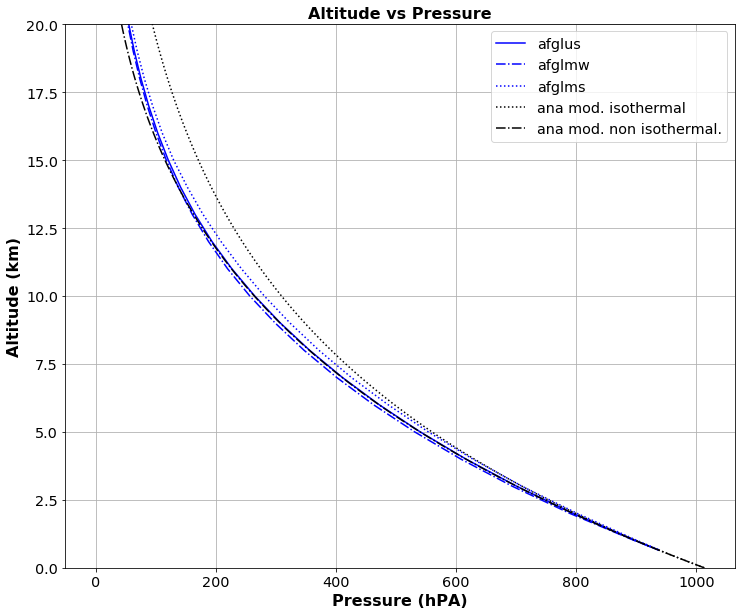

In [33]:
plt.plot(Pressure,z,color='blue',linestyle='-',label='afglus')
plt.plot(Pressure2,z2,color='blue',linestyle='-.',label='afglmw')
plt.plot(Pressure3,z3,color='blue',linestyle=':',label='afglms')
plt.plot(pres_isotherm/100,alt,'k:',label='ana mod. isothermal')
plt.plot(pres/100,alt,'k-.',label='ana mod. non isothermal.')
plt.title('Altitude vs Pressure',fontweight="bold",fontsize=16)
plt.xlabel('Pressure (hPA)',fontweight="bold",fontsize=16)
plt.ylabel('Altitude (km)',fontweight="bold",fontsize=16)
plt.ylim(0.,20.)
plt.grid(True)
plt.legend(loc='best')
if PlotFigFlag:
    plt.savefig('altvspressure_atmmodels.png')

Obviously, the non-adiabatic model for the altitude-Pressure is the most realistic model

In [34]:
h_Temp=np.linspace(0,20,50)*u.km
Temp=T(h_Temp)

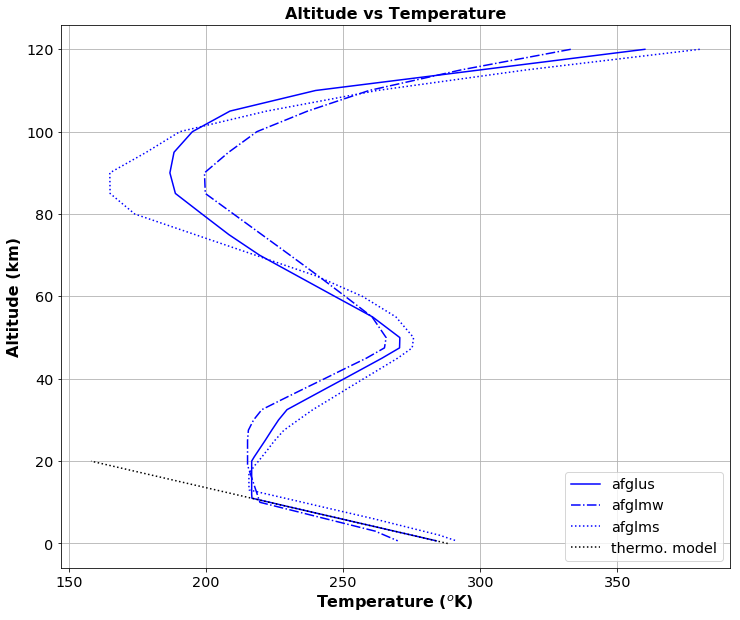

In [35]:
plt.plot(Temperature,z,color='blue',linestyle='-',label='afglus')
plt.plot(Temperature2,z2,color='blue',linestyle='-.',label='afglmw')
plt.plot(Temperature3,z3,color='blue',linestyle=':',label='afglms')
plt.plot(Temp,h_Temp,'k:',label='thermo. model')
plt.title('Altitude vs Temperature',fontweight="bold",fontsize=16)
plt.xlabel('Temperature ($^o$K)',fontweight="bold",fontsize=16)
plt.ylabel('Altitude (km)',fontweight="bold",fontsize=16)
plt.grid(True)
plt.legend(loc='best')
if PlotFigFlag:
    plt.savefig('altvstemperature_model.png')

## Densities

In [36]:
#alt

In [37]:
#dens.decompose()

In [38]:
rho=(dens*(u.cm)**3).decompose()

In [39]:
#print rho

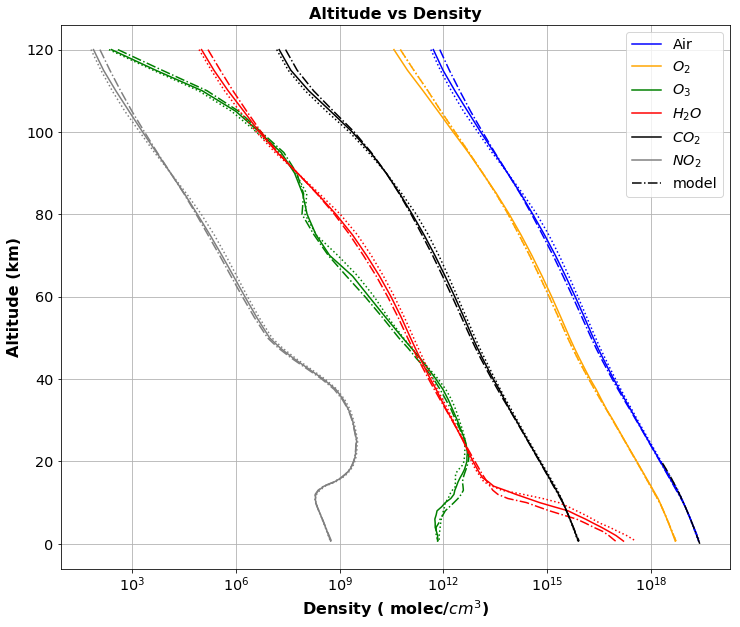

In [40]:
plt.semilogx(AirDensity,z ,label='Air',color='blue')
plt.semilogx(AirDensity2,z2 ,color='blue',linestyle='-.')
plt.semilogx(AirDensity3,z3 ,color='blue',linestyle=':')
plt.semilogx(O2Density,z ,label='$O_2$',color='orange',linestyle='-')
plt.semilogx(O2Density2,z2 ,color='orange',linestyle='-.')
plt.semilogx(O2Density2,z2 ,color='orange',linestyle=':')
plt.semilogx(O3Density,z ,label='$O_3$',color='green',linestyle='-')
plt.semilogx(O3Density2,z2 ,color='green',linestyle='-.')
plt.semilogx(O3Density3,z3 ,color='green',linestyle=':')
plt.semilogx(PWVDensity,z ,label='$H_2O$',color='red',linestyle='-')
plt.semilogx(PWVDensity2,z2 ,color='red',linestyle='-.')
plt.semilogx(PWVDensity3,z3 ,color='red',linestyle=':')
plt.semilogx(CO2Density,z ,label='$CO_2$',color='black',linestyle='-')
plt.semilogx(CO2Density2,z2 ,color='black',linestyle='-.')
plt.semilogx(CO2Density3,z3 ,color='black',linestyle=':')
plt.semilogx(NO2Density,z ,label='$NO_2$',color='grey',linestyle='-')
plt.semilogx(NO2Density2,z2 ,color='grey',linestyle='-.')
plt.semilogx(NO2Density3,z3 ,color='grey',linestyle=':')
plt.semilogx(rho,alt/u.km ,'-.',color='black',label='model')
plt.title('Altitude vs Density',fontweight="bold",fontsize=16)
plt.xlabel('Density ( molec/$cm^{3}$)',fontweight="bold",fontsize=16)
plt.ylabel('Altitude (km)',fontweight="bold",fontsize=16)
plt.legend(loc='best')
plt.grid(True)
if PlotFigFlag:
    plt.savefig('altvsdensity_loglin.png')

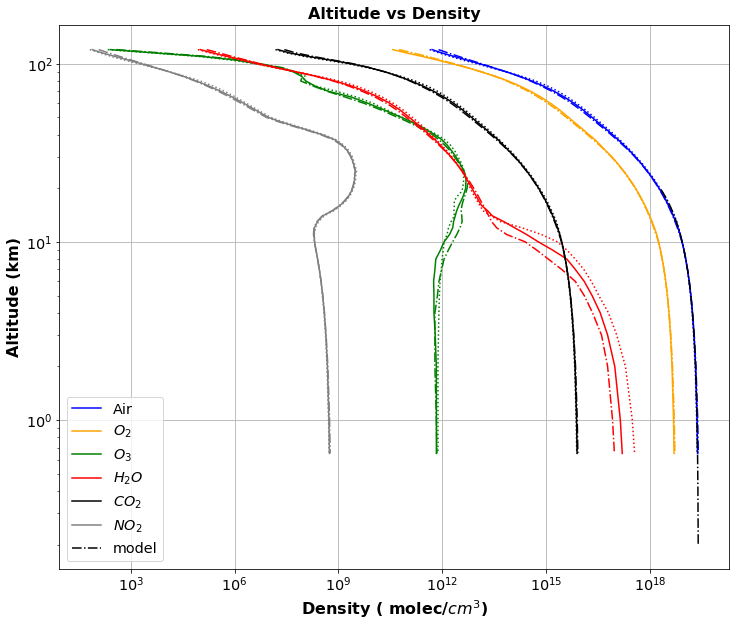

In [41]:
plt.loglog(AirDensity,z ,label='Air',color='blue')
plt.loglog(AirDensity2,z2 ,color='blue',linestyle='-.')
plt.loglog(AirDensity3,z3 ,color='blue',linestyle=':')
plt.loglog(O2Density,z ,label='$O_2$',color='orange',linestyle='-')
plt.loglog(O2Density2,z2 ,color='orange',linestyle='-.')
plt.loglog(O2Density2,z2 ,color='orange',linestyle=':')
plt.loglog(O3Density,z ,label='$O_3$',color='green',linestyle='-')
plt.loglog(O3Density2,z2 ,color='green',linestyle='-.')
plt.loglog(O3Density3,z3 ,color='green',linestyle=':')
plt.loglog(PWVDensity,z ,label='$H_2O$',color='red',linestyle='-')
plt.loglog(PWVDensity2,z2 ,color='red',linestyle='-.')
plt.loglog(PWVDensity3,z3 ,color='red',linestyle=':')
plt.loglog(CO2Density,z ,label='$CO_2$',color='black',linestyle='-')
plt.loglog(CO2Density2,z2 ,color='black',linestyle='-.')
plt.loglog(CO2Density3,z3 ,color='black',linestyle=':')
plt.loglog(NO2Density,z ,label='$NO_2$',color='grey',linestyle='-')
plt.loglog(NO2Density2,z2 ,color='grey',linestyle='-.')
plt.loglog(NO2Density3,z3 ,color='grey',linestyle=':')
plt.loglog(rho,alt/u.km ,'-.',color='black',label='model')
plt.title('Altitude vs Density',fontweight="bold",fontsize=16)
plt.xlabel('Density ( molec/$cm^{3}$)',fontweight="bold",fontsize=16)
plt.ylabel('Altitude (km)',fontweight="bold",fontsize=16)
plt.legend(loc='best')
plt.grid(True)
if PlotFigFlag:
    plt.savefig('altvsdensity_loglog.png')

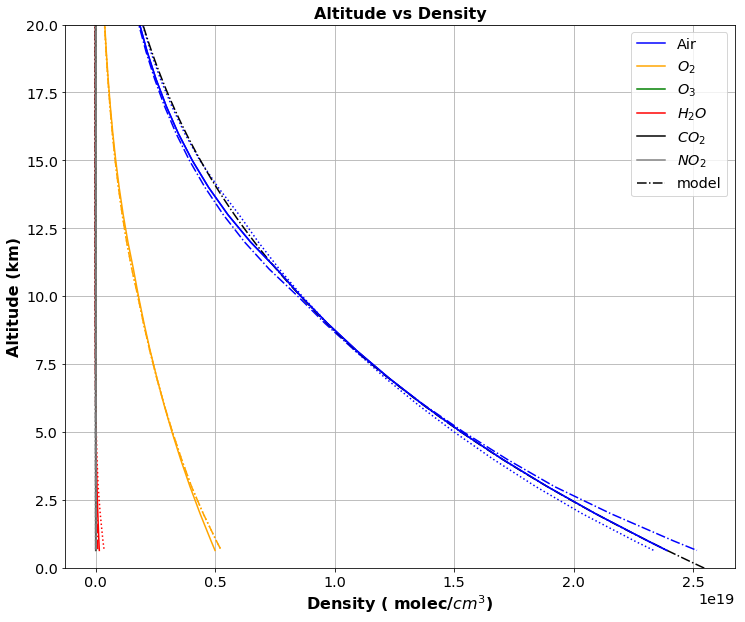

In [42]:
plt.plot(AirDensity,z ,label='Air',color='blue')
plt.plot(AirDensity2,z2 ,color='blue',linestyle='-.')
plt.plot(AirDensity3,z3 ,color='blue',linestyle=':')
plt.plot(O2Density,z ,label='$O_2$',color='orange',linestyle='-')
plt.plot(O2Density2,z2 ,color='orange',linestyle='-.')
plt.plot(O2Density2,z2 ,color='orange',linestyle=':')
plt.plot(O3Density,z ,label='$O_3$',color='green',linestyle='-')
plt.plot(O3Density2,z2 ,color='green',linestyle='-.')
plt.plot(O3Density3,z3 ,color='green',linestyle=':')
plt.plot(PWVDensity,z ,label='$H_2O$',color='red',linestyle='-')
plt.plot(PWVDensity2,z2 ,color='red',linestyle='-.')
plt.plot(PWVDensity3,z3 ,color='red',linestyle=':')
plt.plot(CO2Density,z ,label='$CO_2$',color='black',linestyle='-')
plt.plot(CO2Density2,z2 ,color='black',linestyle='-.')
plt.plot(CO2Density3,z3 ,color='black',linestyle=':')
plt.plot(NO2Density,z ,label='$NO_2$',color='grey',linestyle='-')
plt.plot(NO2Density2,z2 ,color='grey',linestyle='-.')
plt.plot(NO2Density3,z3 ,color='grey',linestyle=':')
plt.plot(rho,alt/u.km ,'-.',color='black',label='model')
plt.plot(AirDensity,z ,color='blue') # overwrite the color
plt.ylim(0.,20.)
plt.title('Altitude vs Density',fontweight="bold",fontsize=16)
plt.xlabel('Density ( molec/$cm^{3}$)',fontweight="bold",fontsize=16)
plt.ylabel('Altitude (km)',fontweight="bold",fontsize=16)
plt.legend(loc='best')
plt.grid(True)
if PlotFigFlag:
    plt.savefig('altvsdensity_linlin.png')

- the model matches perfectly the US standard atmosphere

In [43]:
print 'Pressure_Ground = ', Pressure_Ground,'hPa',Pressure_Ground2,'hPa', Pressure_Ground3,'hPa'
print 'Temperature_Ground = ', Temperature_Ground,'°K',  Temperature_Ground2,'°K',  Temperature_Ground3,'°K'
print 'Air_Density_Ground = ', AirDensity_Ground,' cm-3',AirDensity_Ground2,' cm-3', AirDensity_Ground3,' cm-3'  
print 'O3_Density_Ground = ', O3Density_Ground,' cm-3',O3Density_Ground2,' cm-3',O3Density_Ground3,' cm-3'
print 'O2_Density_Ground = ', O2Density_Ground,' cm-3',O2Density_Ground2,' cm-3',O2Density_Ground3,' cm-3'
print 'PWV_Density_Ground = ', PWVDensity_Ground,' cm-3',PWVDensity_Ground2,' cm-3',PWVDensity_Ground3,' cm-3'
print 'CO2_Density_Ground = ', CO2Density_Ground,' cm-3',CO2Density_Ground2,' cm-3',CO2Density_Ground3,' cm-3'
print 'NO2_Density_Ground = ', NO2Density_Ground,' cm-3',NO2Density_Ground2,' cm-3',NO2Density_Ground3,' cm-3'

Pressure_Ground =  937.22595 hPa 937.82373 hPa 939.39349 hPa
Temperature_Ground =  283.98 °K 269.93 °K 291.28 °K
Air_Density_Ground =  2.39057e+19  cm-3 2.51651e+19  cm-3 2.33597e+19  cm-3
O3_Density_Ground =  678599000000.0  cm-3 703133000000.0  cm-3 753982000000.0  cm-3
O2_Density_Ground =  5.00069e+18  cm-3 5.26286e+18  cm-3 4.88627e+18  cm-3
PWV_Density_Ground =  1.59278e+17  cm-3 9.45742e+16  cm-3 3.62917e+17  cm-3
CO2_Density_Ground =  7.89583e+15  cm-3 8.30977e+15  cm-3 7.71516e+15  cm-3
NO2_Density_Ground =  550316000.0  cm-3 579166000.0  cm-3 537723000.0  cm-3
